In [7]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

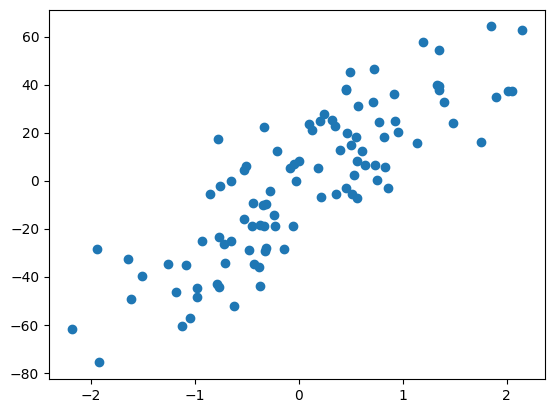

In [10]:
plt.scatter(X, y)
plt.show()

### Apply on Linear data.

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lr_model.coef_)
print(lr_model.intercept_)

[28.67684216]
-2.088699766134101


C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 7.705e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

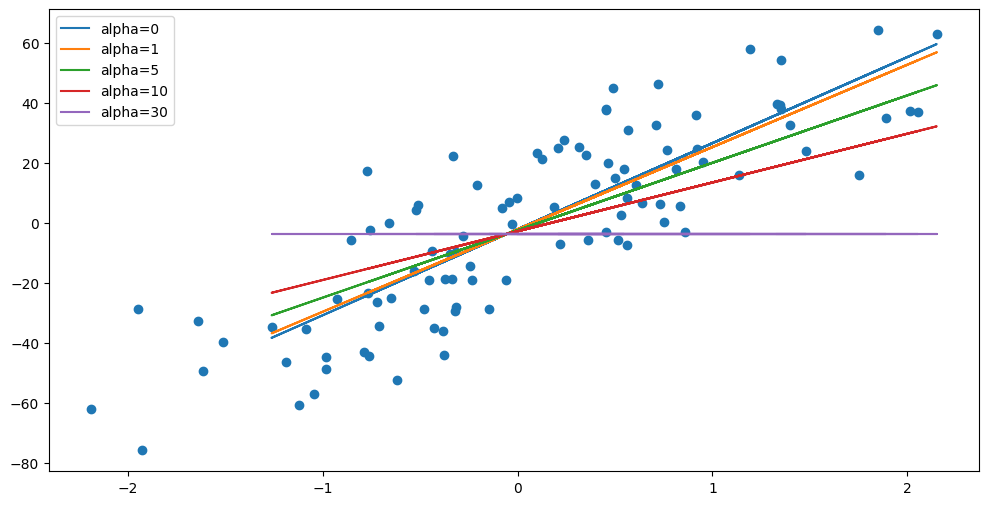

In [14]:
# multiple alphas. 
alphas = [0,1,5,10,30]

plt.figure(figsize=(12,6)) 
plt.scatter(X, y)

for alpha in alphas: 
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    plt.plot(X_test,lasso_model.predict(X_test),label='alpha={}'.format(alpha))

plt.legend()
plt.show()

### Apply on Polynomial Dataset. 

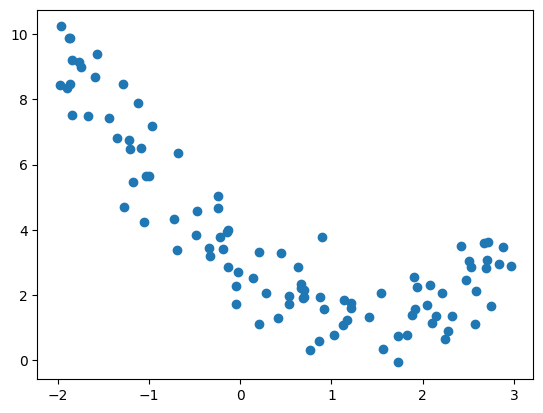

In [15]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohd Uzaif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.578e+01, tolerance: 7.170e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

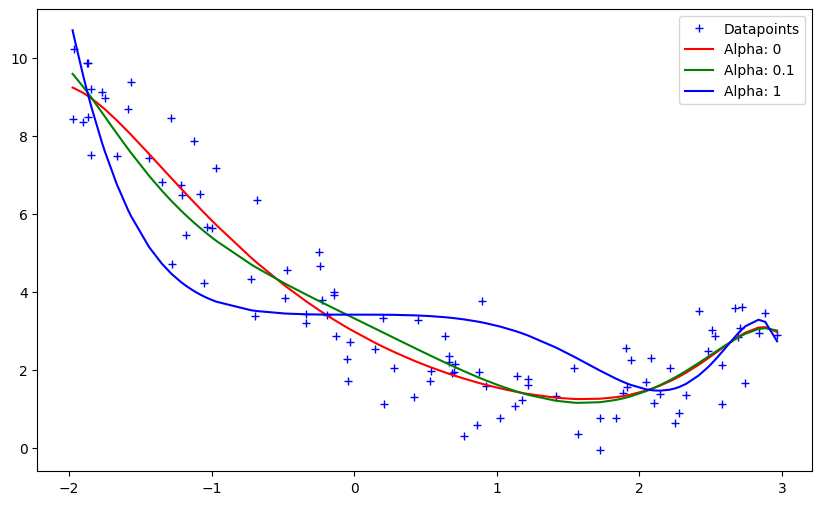

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()